In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
tele_data=pd.read_excel(r"float.xlsx",header=0)

tele_data_bk=tele_data.copy()

tele_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
tele_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn_count=tele_data.Churn.value_counts()
print('Class 0:', churn_count[0])
print('Class 1:', churn_count[1])
print('Proportion:', round(churn_count[0] / churn_count[1], 2), ': 1')
print('Total HS Records:', len(tele_data))

Class 0: 5174
Class 1: 1869
Proportion: 2.77 : 1
Total HS Records: 7043


In [6]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

tele_data['gender'] = LE.fit_transform(tele_data['gender'])
tele_data['MultipleLines']=LE.fit_transform(tele_data['MultipleLines'])
tele_data['Partner']=LE.fit_transform(tele_data['Partner'])
tele_data['Dependents']=LE.fit_transform(tele_data['Dependents'])
tele_data['PaperlessBilling'] =LE.fit_transform(tele_data['PaperlessBilling'])
tele_data['PhoneService']=LE.fit_transform(tele_data['PhoneService'])
tele_data['InternetService'] = LE.fit_transform(tele_data['InternetService'])
tele_data['OnlineSecurity'] = LE.fit_transform(tele_data['OnlineSecurity'])
tele_data['OnlineBackup'] = LE.fit_transform(tele_data['OnlineBackup'])
tele_data['DeviceProtection'] = LE.fit_transform(tele_data['DeviceProtection'])
tele_data['TechSupport'] = LE.fit_transform(tele_data['TechSupport'])
tele_data['StreamingTV'] = LE.fit_transform(tele_data['StreamingTV'])
tele_data['StreamingMovies'] = LE.fit_transform(tele_data['StreamingMovies'])
tele_data['Contract'] = LE.fit_transform(tele_data['Contract'])
tele_data['PaymentMethod'] = LE.fit_transform(tele_data['PaymentMethod'])


In [7]:
tele_data['Churn'].replace(['Yes','No'],[0,1],inplace=True)
tele_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0


In [8]:
tele_data['PaymentMethod'].value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

In [9]:
del tele_data['customerID']

In [10]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [11]:
tele_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
cols1=['tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','MonthlyCharges','TotalCharges']

In [13]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in tele_data.columns:
    if col != 'Churn':
        IndepVar.append(col)

TargetVar = 'Churn'

x = tele_data[IndepVar]
y = tele_data[TargetVar]

In [14]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [16]:
# Load the Results dataset

CSResults = pd.read_csv(r"HTResults.csv", header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1389  150]
 [ 251  323]]
Outcome values : 
 1389 150 251 323
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.90      0.87      1539
           0       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113

Accuracy : 81.0 %
Precision : 84.7 %
Recall : 90.3 %
F1 Score : 0.874
Specificity or True Negative Rate : 56.3 %
Balanced Accuracy : 73.3 %
MCC : 0.496
roc_auc_score: 0.733


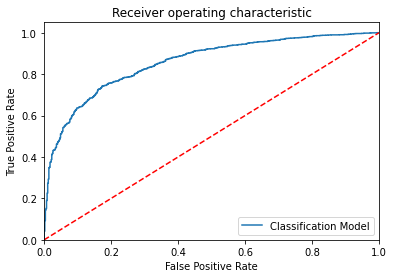

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1253  286]
 [ 288  286]]
Outcome values : 
 1253 286 288 286
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.81      0.81      1539
           0       0.50      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Accuracy : 72.8 %
Precision : 81.3 %
Recall : 81.4 %
F1 Score : 0.814
Specificity or True Negative Rate : 49.8 %
Balanced Accuracy : 65.6 %
MCC : 0.313
roc_auc_score: 0.656


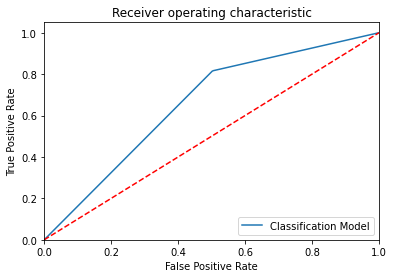

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1404  135]
 [ 292  282]]
Outcome values : 
 1404 135 292 282
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.91      0.87      1539
           0       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 79.8 %
Precision : 82.8 %
Recall : 91.2 %
F1 Score : 0.868
Specificity or True Negative Rate : 49.1 %
Balanced Accuracy : 70.2 %
MCC : 0.451
roc_auc_score: 0.702


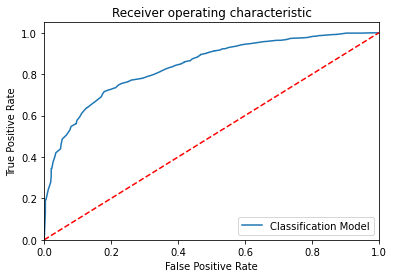

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1375  164]
 [ 303  271]]
Outcome values : 
 1375 164 303 271
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85      1539
           0       0.62      0.47      0.54       574

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Accuracy : 77.9 %
Precision : 81.9 %
Recall : 89.3 %
F1 Score : 0.855
Specificity or True Negative Rate : 47.2 %
Balanced Accuracy : 68.2 %
MCC : 0.402
roc_auc_score: 0.683


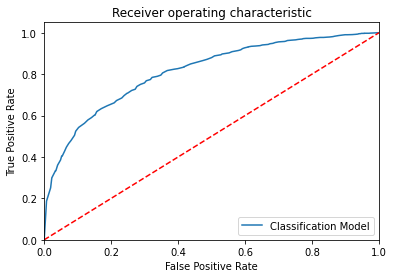

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1312  227]
 [ 293  281]]
Outcome values : 
 1312 227 293 281
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.85      0.83      1539
           0       0.55      0.49      0.52       574

    accuracy                           0.75      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113

Accuracy : 75.4 %
Precision : 81.7 %
Recall : 85.3 %
F1 Score : 0.835
Specificity or True Negative Rate : 49.0 %
Balanced Accuracy : 67.2 %
MCC : 0.356
roc_auc_score: 0.671


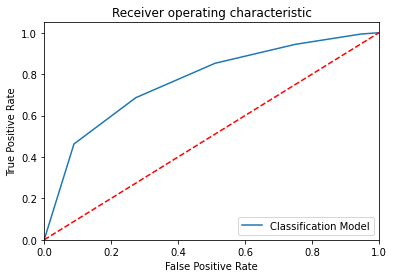

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[1414  125]
 [ 298  276]]
Outcome values : 
 1414 125 298 276
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.92      0.87      1539
           0       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 80.0 %
Precision : 82.6 %
Recall : 91.9 %
F1 Score : 0.87
Specificity or True Negative Rate : 48.1 %
Balanced Accuracy : 70.0 %
MCC : 0.453
roc_auc_score: 0.7


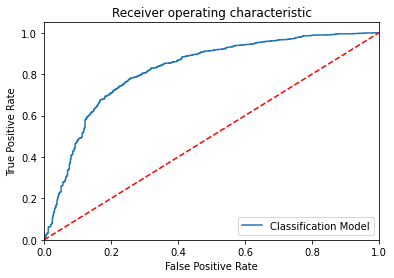

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[1388  151]
 [ 295  279]]
Outcome values : 
 1388 151 295 279
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.90      0.86      1539
           0       0.65      0.49      0.56       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy : 78.9 %
Precision : 82.5 %
Recall : 90.2 %
F1 Score : 0.862
Specificity or True Negative Rate : 48.6 %
Balanced Accuracy : 69.4 %
MCC : 0.429
roc_auc_score: 0.694


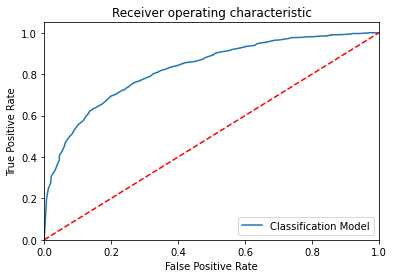

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[1392  147]
 [ 278  296]]
Outcome values : 
 1392 147 278 296
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.90      0.87      1539
           0       0.67      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 79.9 %
Precision : 83.4 %
Recall : 90.4 %
F1 Score : 0.868
Specificity or True Negative Rate : 51.6 %
Balanced Accuracy : 71.0 %
MCC : 0.459
roc_auc_score: 0.71


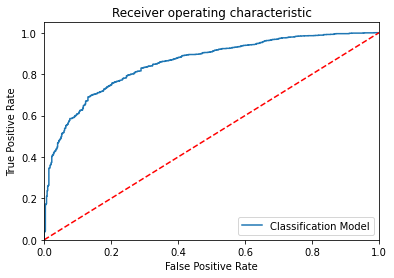

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1390  149]
 [ 272  302]]
Outcome values : 
 1390 149 272 302
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.90      0.87      1539
           0       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 80.1 %
Precision : 83.6 %
Recall : 90.3 %
F1 Score : 0.868
Specificity or True Negative Rate : 52.6 %
Balanced Accuracy : 71.4 %
MCC : 0.466
roc_auc_score: 0.715


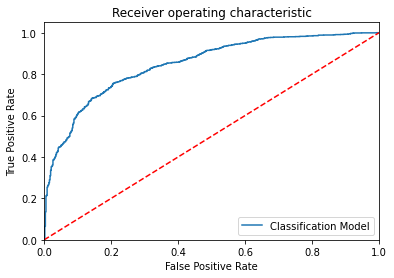

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1160  379]
 [ 135  439]]
Outcome values : 
 1160 379 135 439
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.75      0.82      1539
           0       0.54      0.76      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Accuracy : 75.7 %
Precision : 89.6 %
Recall : 75.4 %
F1 Score : 0.819
Specificity or True Negative Rate : 76.5 %
Balanced Accuracy : 76.0 %
MCC : 0.474
roc_auc_score: 0.759


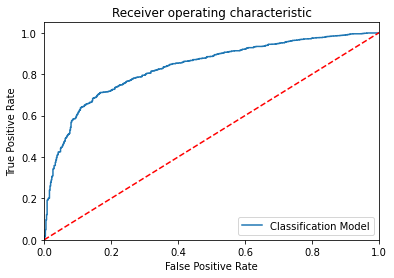

-----------------------------------------------------------------------------------------------------


In [17]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [18]:
CSResults.head(20)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1389,150,251,323,0.810,0.847,0.903,0.874,0.563,0.496,0.732626,0.733
1,DecisionTreeClassifier(),1253,286,288,286,0.728,0.813,0.814,0.814,0.498,0.313,0.656211,0.656
2,"(DecisionTreeClassifier(max_features='auto', r...",1404,135,292,282,0.798,0.828,0.912,0.868,0.491,0.451,0.701785,0.702
3,"(ExtraTreeClassifier(random_state=522154775), ...",1375,164,303,271,0.779,0.819,0.893,0.855,0.472,0.402,0.682781,0.682
4,KNeighborsClassifier(),1312,227,293,281,0.754,0.817,0.853,0.835,0.490,0.356,0.671024,0.672
5,SVC(probability=True),1414,125,298,276,0.800,0.826,0.919,0.870,0.481,0.453,0.699807,0.700
6,(DecisionTreeClassifier(random_state=229899809...,1388,151,295,279,0.789,0.825,0.902,0.862,0.486,0.429,0.693974,0.694
7,([DecisionTreeRegressor(criterion='friedman_ms...,1392,147,278,296,0.799,0.834,0.904,0.868,0.516,0.459,0.710081,0.710
8,LGBMClassifier(),1390,149,272,302,0.801,0.836,0.903,0.868,0.526,0.466,0.714658,0.714
9,GaussianNB(),1160,379,135,439,0.757,0.896,0.754,0.819,0.765,0.474,0.759272,0.760


In [19]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Performance or convergence with different solvers

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Regularization (penalty)

penalty = ['none', 'l1', 'l2', 'elasticnet']

# C parameter controls the penality strength

C_space = np.logspace(-5, 8, 15)

# Class weight 

class_weight = ['None', 'dict', 'balanced']

# Maximum number of iterations taken for the solvers to converge

max_iter = [100, 1000, 2500, 5000]

# Create the random grid

Random_Grid = {'solver': solver,
               'penalty': penalty,
               'C': C_space,
               'class_weight': class_weight,
               'max_iter' : max_iter
              }

print(Random_Grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]), 'class_weight': ['None', 'dict', 'balanced'], 'max_iter': [100, 1000, 2500, 5000]}


In [20]:
# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [21]:
ModelLR = LogisticRegression()

ModelLR_RandomCV=RandomizedSearchCV(estimator=ModelLR, param_distributions=Random_Grid, n_iter=100, cv=RKCV, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelLR_RandomCV.fit(x_train,y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 2985 out of 3000 | elapsed:   20.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   20.5s finished


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                                        'class_weight': ['None', 'dict',
                                                         'balanced'],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                             

In [22]:
# best or the optimal values of the parameters for which the model performed the best

ModelLR_RandomCV.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'max_iter': 5000,
 'class_weight': 'None',
 'C': 0.4393970560760795}

Confusion matrix : 
 [[1395  144]
 [ 256  318]]
Outcome values : 
 1395 144 256 318
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.91      0.87      1539
           0       0.69      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Accuracy : 81.1 %
Precision : 84.5 %
Recall : 90.6 %
F1 Score : 0.875
Specificity or True Negative Rate : 55.4 %
Balanced Accuracy : 73.0 %
MCC : 0.496
roc_auc_score: 0.73


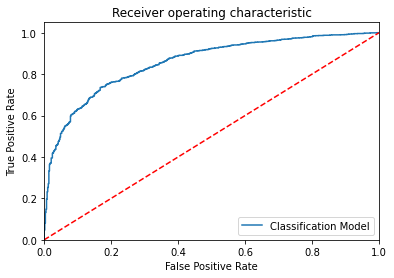

-----------------------------------------------------------------------------------------------------


In [23]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter with RandomizedSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.4393970560760795, fit_intercept=True,
                             intercept_scaling=1, class_weight='None', random_state=None, solver='sag', 
                             max_iter=5000, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [24]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'C': [100, 10, 1.0, 0.1, 0.01],
           'class_weight': ['None', 'dict', 'balanced'],
           'max_iter': [100, 1000,2500, 5000]
          }

# Create object for model

ModelLR = LogisticRegression(dual=True)

# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelLR, param_grid = GS_grid, cv = RKCV, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 30 folds for each of 1200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 9104 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 14266 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 19764 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 25792 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 34224 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  1.8min finished


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(dual=True), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': ['None', 'dict', 'balanced'],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [25]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

Confusion matrix : 
 [[1116  423]
 [  95  479]]
Outcome values : 
 1116 423 95 479
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.73      0.81      1539
           0       0.53      0.83      0.65       574

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.77      2113

Accuracy : 75.5 %
Precision : 92.2 %
Recall : 72.5 %
F1 Score : 0.812
Specificity or True Negative Rate : 83.4 %
Balanced Accuracy : 78.0 %
MCC : 0.503
roc_auc_score: 0.78


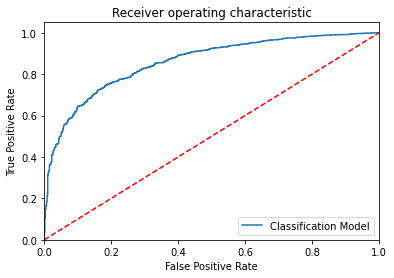

-----------------------------------------------------------------------------------------------------


In [26]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter tuning with GridSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True,
                             intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', 
                             max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [27]:
CSResults.head(30)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1389,150,251,323,0.810,0.847,0.903,0.874,0.563,0.496,0.732626,0.733
1,DecisionTreeClassifier(),1253,286,288,286,0.728,0.813,0.814,0.814,0.498,0.313,0.656211,0.656
2,"(DecisionTreeClassifier(max_features='auto', r...",1404,135,292,282,0.798,0.828,0.912,0.868,0.491,0.451,0.701785,0.702
3,"(ExtraTreeClassifier(random_state=522154775), ...",1375,164,303,271,0.779,0.819,0.893,0.855,0.472,0.402,0.682781,0.682
4,KNeighborsClassifier(),1312,227,293,281,0.754,0.817,0.853,0.835,0.490,0.356,0.671024,0.672
5,SVC(probability=True),1414,125,298,276,0.800,0.826,0.919,0.870,0.481,0.453,0.699807,0.700
6,(DecisionTreeClassifier(random_state=229899809...,1388,151,295,279,0.789,0.825,0.902,0.862,0.486,0.429,0.693974,0.694
7,([DecisionTreeRegressor(criterion='friedman_ms...,1392,147,278,296,0.799,0.834,0.904,0.868,0.516,0.459,0.710081,0.710
8,LGBMClassifier(),1390,149,272,302,0.801,0.836,0.903,0.868,0.526,0.466,0.714658,0.714
9,GaussianNB(),1160,379,135,439,0.757,0.896,0.754,0.819,0.765,0.474,0.759272,0.760
